In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# load dataset
df = pd.read_csv("WorldCS2016_ML_DT.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Authors              10000 non-null  int64  
 2   CiteScore            7225 non-null   float64
 3   CiteScorePercentile  7225 non-null   float64
 4   Views                10000 non-null  int64  
 5   OpenAccess           10000 non-null  int64  
 6   Affiliations         10000 non-null  int64  
 7   Prominence           9980 non-null   float64
 8   Citations            10000 non-null  int64  
 9   FWCI                 10000 non-null  float64
 10  Publication type     10000 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 859.5+ KB


In [4]:
df.groupby(['Publication type']).count()

,Unnamed: 0,Authors,CiteScore,CiteScorePercentile,Views,OpenAccess,Affiliations,Prominence,Citations,FWCI
Publication type,,,,,,,,,,
Article,5609,5609,5463,5463,5609,5609,5609,5600,5609,5609
Article in Press,1,1,1,1,1,1,1,1,1,1
Book,24,24,0,0,24,24,24,24,24,24
Chapter,73,73,31,31,73,73,73,72,73,73
Conference Paper,4021,4021,1474,1474,4021,4021,4021,4018,4021,4021
Editorial,12,12,10,10,12,12,12,9,12,12
Erratum,1,1,1,1,1,1,1,0,1,1
Letter,4,4,4,4,4,4,4,4,4,4
Note,8,8,7,7,8,8,8,6,8,8


In [5]:
df = df[['Authors', 'CiteScore', 'CiteScorePercentile', 'Views', 'OpenAccess', 'Affiliations','Prominence','Citations','FWCI', 'Publication type']]

In [6]:
options = ['Article', 'Book', 'Chapter','Conference Paper', 'Review'] 
    
df1 = df[(df['Publication type'].isin(options))]
df1

,Authors,CiteScore,CiteScorePercentile,Views,OpenAccess,Affiliations,Prominence,Citations,FWCI,Publication type
0,3,8.2,1.0,34,0,3,84.818,21,1.99,Article
1,6,NaN,NaN,26,1,4,98.539,11,3.50,Conference Paper
2,3,NaN,NaN,16,0,1,99.552,49,6.91,Conference Paper
3,4,NaN,NaN,14,0,3,91.386,11,3.33,Conference Paper
4,3,1.6,38.0,71,0,2,74.678,10,0.52,Article
...,...,...,...,...,...,...,...,...,...,...
9995,4,2.5,34.0,155,1,3,93.135,16,1.50,Article
9996,1,3.8,18.0,24,1,2,73.550,19,0.75,Article
9997,4,NaN,NaN,28,0,3,97.234,22,5.42,Conference Paper
9998,3,0.7,63.0,17,1,4,98.203,12,1.09,Article


In [7]:
df1 = df1.dropna()
df1.groupby(['Publication type']).mean()

,Authors,CiteScore,CiteScorePercentile,Views,OpenAccess,Affiliations,Prominence,Citations,FWCI
Publication type,,,,,,,,,
Article,3.728323,5.387974,17.346288,41.567003,0.342255,2.663428,87.237729,36.308708,2.346724
Chapter,3.516129,1.880645,52.935484,35.129032,0.225806,2.354839,85.778258,33.645161,8.080323
Conference Paper,4.610319,3.116158,41.399185,24.382892,0.433809,2.658520,86.284769,32.876443,4.055513
Review,3.585903,5.217621,20.396476,64.731278,0.546256,2.581498,89.261599,71.942731,1.946916


In [8]:
# Predictors
X = df1[['Authors', 'Views', 'OpenAccess', 'Affiliations','Prominence','Citations','FWCI']]
# encoding publication type
y = df1['Publication type']
y,class_names = pd.factorize(y)

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [10]:
# Fitting Classifier to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [11]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))


Accuracy: 0.84
Confusion Matrix: 
 [[3995   87    9    0]
 [ 631  474    0    0]
 [ 127    2   41    0]
 [   6   17    0    0]]
                  precision    recall  f1-score   support

         Article       0.84      0.98      0.90      4091
Conference Paper       0.82      0.43      0.56      1105
          Review       0.82      0.24      0.37       170
         Chapter       0.00      0.00      0.00        23

        accuracy                           0.84      5389
       macro avg       0.62      0.41      0.46      5389
    weighted avg       0.83      0.84      0.81      5389



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.83
Confusion Matrix: 
 [[1329   31    4    0]
 [ 220  148    0    0]
 [  46    0   11    0]
 [   3    5    0    0]]
                  precision    recall  f1-score   support

         Article       0.83      0.97      0.90      1364
Conference Paper       0.80      0.40      0.54       368
          Review       0.73      0.19      0.31        57
         Chapter       0.00      0.00      0.00         8

        accuracy                           0.83      1797
       macro avg       0.59      0.39      0.43      1797
    weighted avg       0.82      0.83      0.80      1797



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


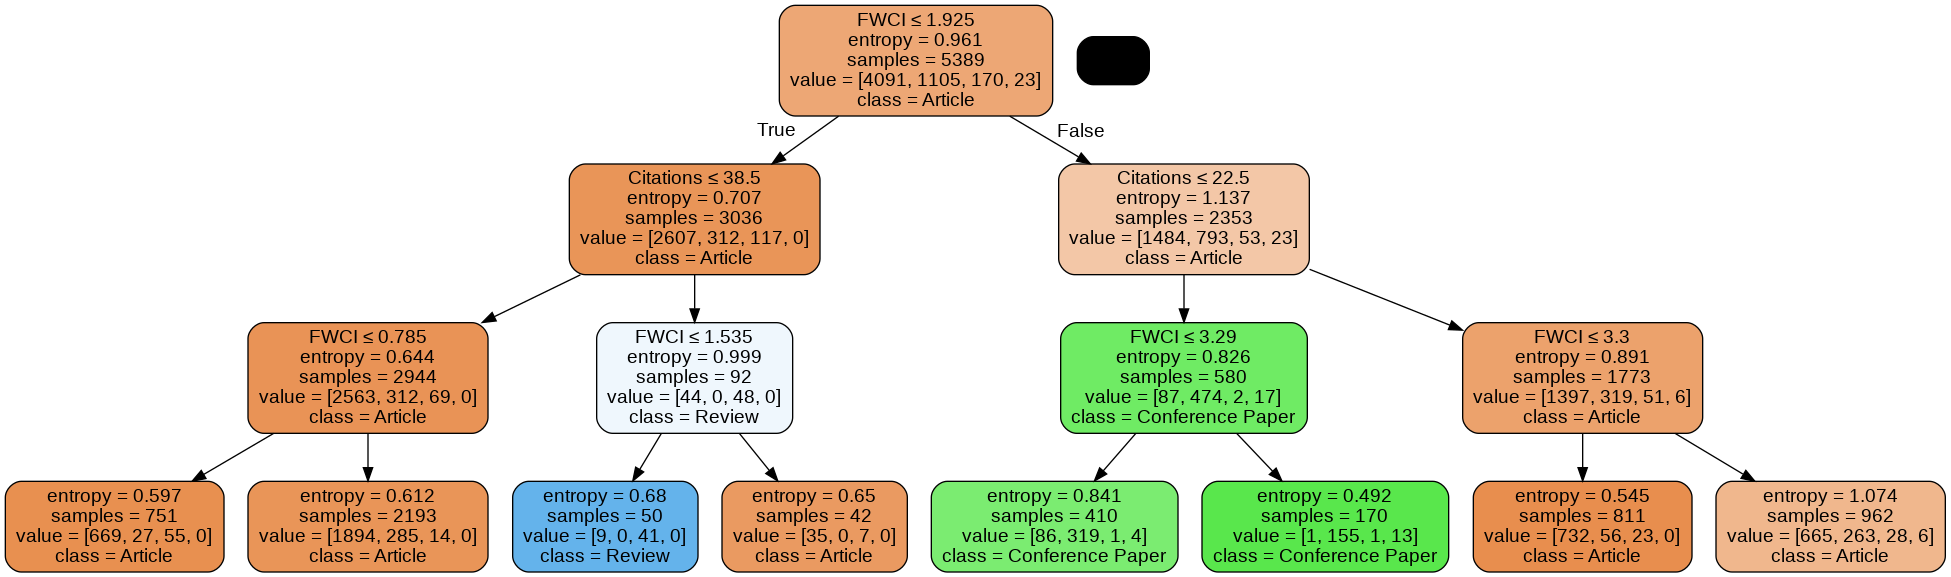

In [13]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

feature_names = ['Authors', 'Views', 'OpenAccess', 'Affiliations','Prominence','Citations','FWCI']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_names,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('papersDT.png')
Image(graph.create_png())


Answer the following questions:
- Which are the most relevant features for distinguish between publication types?
- Which publication types can be recognized?
- Which class is more accurately predicted?

### Hands on exercise



1. Build a Decision Tree with max_depth = 4 and max_dept = 5
2. Plot the Decision Trees
3. Generate their accuracy reports

#### Training Set Depth 4

In [16]:
# Fitting Classifier to the Training Set - depth4
from sklearn.tree import DecisionTreeClassifier
classifier_depth4 = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
classifier_depth4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [18]:
# Model performance on training set
y_pred_train =classifier_depth4.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy_depth4 = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy_depth4))
cm_depth4=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm_depth4)
print(classification_report(y_train, y_pred_train, target_names=class_names))


Accuracy: 0.85
Confusion Matrix: 
 [[3921  156   14    0]
 [ 493  612    0    0]
 [  98    4   68    0]
 [   4   19    0    0]]
                  precision    recall  f1-score   support

         Article       0.87      0.96      0.91      4091
Conference Paper       0.77      0.55      0.65      1105
          Review       0.83      0.40      0.54       170
         Chapter       0.00      0.00      0.00        23

        accuracy                           0.85      5389
       macro avg       0.62      0.48      0.52      5389
    weighted avg       0.84      0.85      0.84      5389



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Predicting the test results
y_pred=classifier_depth4.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy_depth4 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy_depth4))

from sklearn.metrics import confusion_matrix, classification_report
cm_depth4 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm_depth4)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.85
Confusion Matrix: 
 [[1305   55    4    0]
 [ 169  198    1    0]
 [  36    0   21    0]
 [   2    6    0    0]]
                  precision    recall  f1-score   support

         Article       0.86      0.96      0.91      1364
Conference Paper       0.76      0.54      0.63       368
          Review       0.81      0.37      0.51        57
         Chapter       0.00      0.00      0.00         8

        accuracy                           0.85      1797
       macro avg       0.61      0.47      0.51      1797
    weighted avg       0.84      0.85      0.83      1797



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


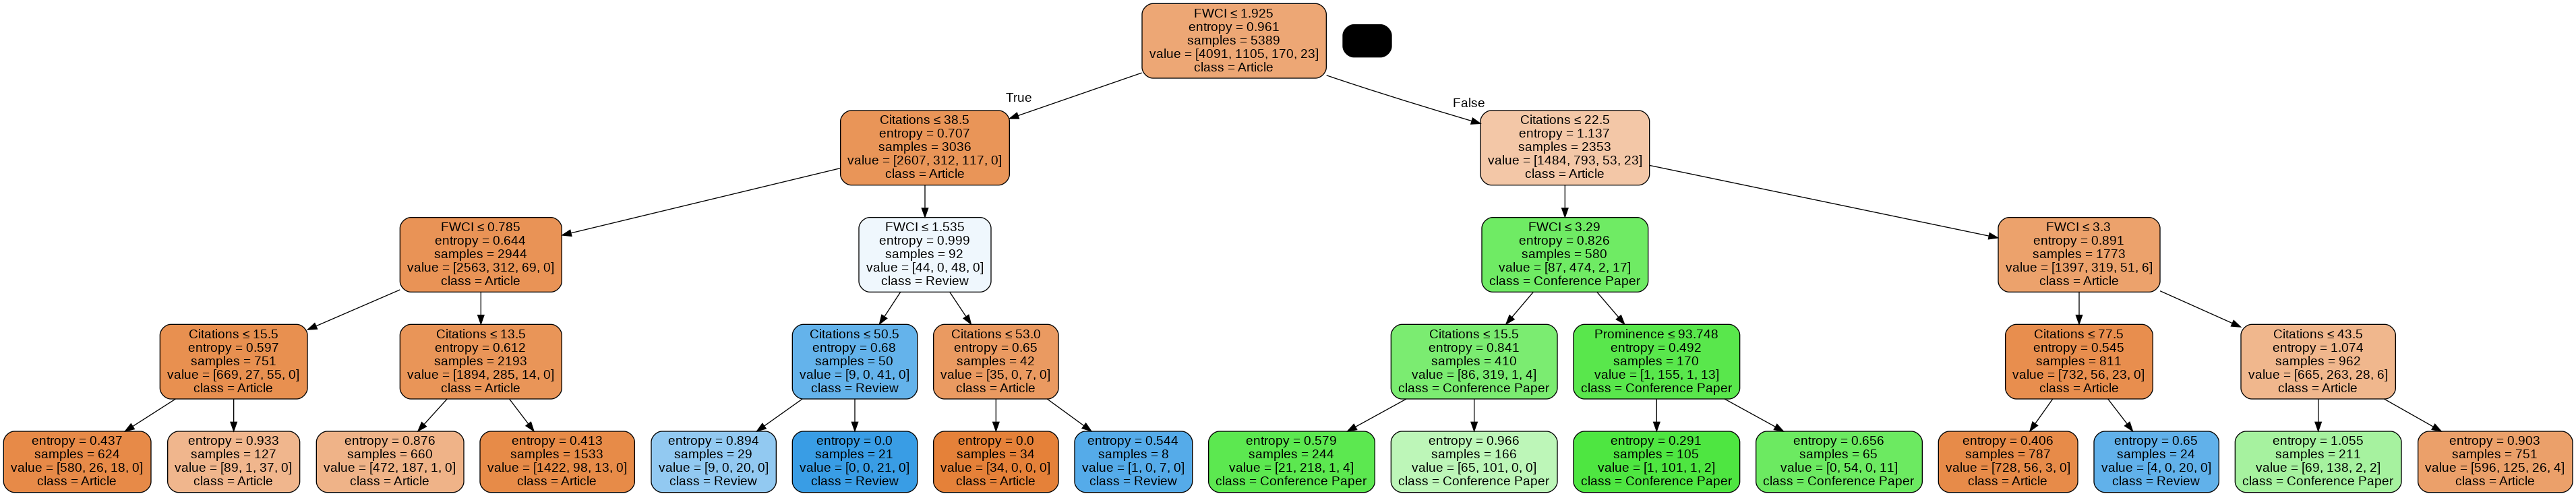

In [23]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

feature_names = ['Authors', 'Views', 'OpenAccess', 'Affiliations','Prominence','Citations','FWCI']
dot_data = StringIO()
export_graphviz(classifier_depth4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_names,class_names=class_names)
graph_depth4 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph_depth4.write_png('papersDT.png')
Image(graph_depth4.create_png())


#### Training Set Depth 5

In [17]:
# Fitting Classifier to the Training Set - depth5
from sklearn.tree import DecisionTreeClassifier
classifier_depth5 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
classifier_depth5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [20]:
# Model performance on training set
y_pred_train = classifier_depth5.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy_depth5 = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy_depth5))
cm_depth5 = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm_depth5)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.86
Confusion Matrix: 
 [[3840  220   31    0]
 [ 377  728    0    0]
 [  79    5   86    0]
 [   4   16    0    3]]
                  precision    recall  f1-score   support

         Article       0.89      0.94      0.92      4091
Conference Paper       0.75      0.66      0.70      1105
          Review       0.74      0.51      0.60       170
         Chapter       1.00      0.13      0.23        23

        accuracy                           0.86      5389
       macro avg       0.84      0.56      0.61      5389
    weighted avg       0.86      0.86      0.86      5389



In [22]:
# Predicting the test results
y_pred=classifier_depth4.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy_depth5 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy_depth5))

from sklearn.metrics import confusion_matrix, classification_report
cm_depth5 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm_depth5)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.85
Confusion Matrix: 
 [[1305   55    4    0]
 [ 169  198    1    0]
 [  36    0   21    0]
 [   2    6    0    0]]
                  precision    recall  f1-score   support

         Article       0.86      0.96      0.91      1364
Conference Paper       0.76      0.54      0.63       368
          Review       0.81      0.37      0.51        57
         Chapter       0.00      0.00      0.00         8

        accuracy                           0.85      1797
       macro avg       0.61      0.47      0.51      1797
    weighted avg       0.84      0.85      0.83      1797



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


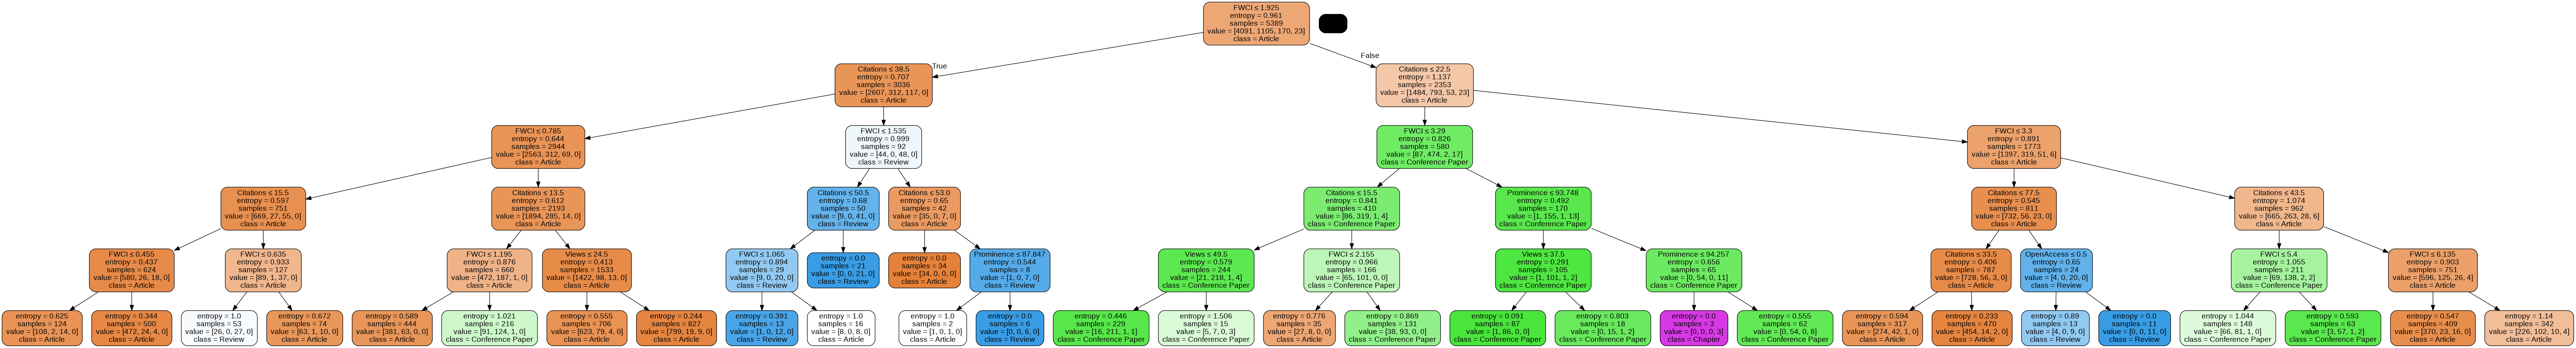

In [24]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

feature_names = ['Authors', 'Views', 'OpenAccess', 'Affiliations','Prominence','Citations','FWCI']
dot_data = StringIO()
export_graphviz(classifier_depth5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_names,class_names=class_names)
graph_depth5 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph_depth5.write_png('papersDT.png')
Image(graph_depth5.create_png())


#### Answer the following questions:

- Did the overall accuracy improved in these DTs?
    - The overall acurracy increases by a small delta
- Was it possible to recognize Reviews?
    - We are able to recognize Reviews
- Did you find any pure set?
    - To be anounced...